In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
#from top_level_features import hog_features
import time
#from top_level_features import color_histogram_hsv
#from top_level_features import extract_features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

print("=================== Packages Loaded ===================")

=================== Packages Loaded ===================


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


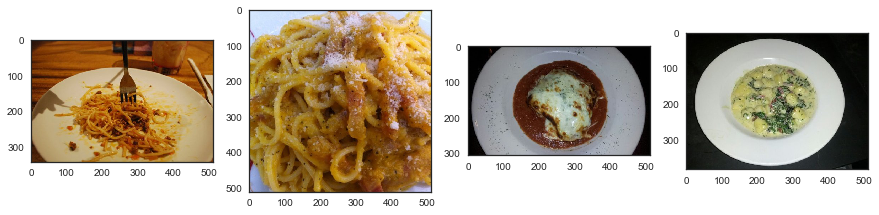

In [4]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [5]:
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================


In [6]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 70:30 ===================")
X = np.array(all_imgs)
Y = np.array(all_labels)
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 70:30 ===================
For Main Data Set : 3999
For Train Set : 2799
For Test Set : 1200


In [7]:
unique, counts = np.unique(Y, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 1000]
 [   1 1000]
 [   2  999]
 [   3 1000]]


In [12]:
y_train = to_categorical(y_train, num_classes = 4)

In [13]:
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [19]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (2519, 12675)